In [1]:
# Ignore Warnings
import warnings
from warnings import simplefilter
warnings.filterwarnings("ignore")

# Computational imports
import numpy as np   # Library for n-dimensional arrays
import pandas as pd  # Library for dataframes (structured data)

# Helper imports
import os 
import re
import time
import warnings
from tqdm import tqdm
import datetime as dt
import pandas_datareader as web
from datetime import datetime
import scipy.stats as stats
from pathlib import Path

# ML/DL imports
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder, RobustScaler
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_probability as tfp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Plotting imports
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

%matplotlib inline
init_notebook_mode(connected=True)

# Set seeds to make the experiment more reproducible.
from numpy.random import seed
seed(1)

# Allows us to see more information regarding the DataFrame
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [2]:
url = 'https://www.cryptodatadownload.com/cdd/Exmo_ADAUSD_1h.csv'
dataset = pd.read_csv(url, index_col="date", skiprows=1)
#dataset = pd.read_csv('Gemini_BTCUSD_1h.csv', index_col="date", skiprows=1)
dataset.head()

,unix,symbol,open,high,low,close,Volume USD,Volume ADA
date,,,,,,,,
2022-09-08 01:00:00,1662598800000,ADA/USD,0.528701,0.530139,0.528619,0.529845,6217.475895,11734.508421
2022-09-08 00:00:00,1662595200000,ADA/USD,0.529049,0.531184,0.526100,0.528689,23428.452008,44314.203750
2022-09-07 23:00:00,1662591600000,ADA/USD,0.529765,0.533084,0.527979,0.529194,25759.268995,48676.394389
2022-09-07 22:00:00,1662588000000,ADA/USD,0.530651,0.531632,0.527942,0.528570,21572.264726,40812.472145
2022-09-07 21:00:00,1662584400000,ADA/USD,0.528794,0.530868,0.526959,0.530472,22300.310454,42038.624048


In [3]:
dataset = dataset.iloc[::-1]

dataset.head()



,unix,symbol,open,high,low,close,Volume USD,Volume ADA
date,,,,,,,,
2018-05-15 06:00:00,1526364000,ADA/USD,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-15 07:00:00,1526367600,ADA/USD,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-15 08:00:00,1526371200,ADA/USD,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-15 09:00:00,1526374800,ADA/USD,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-15 10:00:00,1526378400,ADA/USD,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df = dataset.reset_index()
df

,date,unix,symbol,open,high,low,close,Volume USD,Volume ADA
0,2018-05-15 06:00:00,1526364000,ADA/USD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2018-05-15 07:00:00,1526367600,ADA/USD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2018-05-15 08:00:00,1526371200,ADA/USD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2018-05-15 09:00:00,1526374800,ADA/USD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2018-05-15 10:00:00,1526378400,ADA/USD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
37479,2022-09-07 21:00:00,1662584400000,ADA/USD,0.528794,0.530868,0.526959,0.530472,22300.310454,42038.624048
37480,2022-09-07 22:00:00,1662588000000,ADA/USD,0.530651,0.531632,0.527942,0.528570,21572.264726,40812.472145
37481,2022-09-07 23:00:00,1662591600000,ADA/USD,0.529765,0.533084,0.527979,0.529194,25759.268995,48676.394389
37482,2022-09-08 00:00:00,1662595200000,ADA/USD,0.529049,0.531184,0.526100,0.528689,23428.452008,44314.203750


In [5]:
#plt.figure(figsize=(10,5))
#sns.lineplot(x='date', y='close', data=df).set_title("Price of ADA")


In [6]:
df = df[["open", "high", "low", "close","Volume ADA", "Volume USD"]]
#df = df[['Close']]
df.head()
SEQ_LEN = 120
FUTURE_PERIOD = 10

RATIO_TO_PREDICT = "Close"
df

,open,high,low,close,Volume ADA,Volume USD
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
37479,0.528794,0.530868,0.526959,0.530472,42038.624048,22300.310454
37480,0.530651,0.531632,0.527942,0.528570,40812.472145,21572.264726
37481,0.529765,0.533084,0.527979,0.529194,48676.394389,25759.268995
37482,0.529049,0.531184,0.526100,0.528689,44314.203750,23428.452008


In [12]:
times = sorted(df.index.values)  # get the times
last_10 = times[-int(0.1*len(times))] 
last_20 = times[-int(0.2*len(times))]

test_df = df[(df.index >= last_10)]
validation_df = df[(df.index >= last_20) & (df.index < last_10)]  
train_df = df[(df.index < last_20)]
print(last_20)

29988


In [13]:
train_ = train_df.values
valid_ = validation_df.values
test_ = test_df.values
valid_.shape

(3748, 6)

In [14]:
print("train shape {0}".format(train_.shape))
print("valid shape {0}".format(valid_.shape))
print("test shape {0}".format(test_.shape))


train shape (29988, 6)
valid shape (3748, 6)
test shape (3748, 6)


In [15]:
def line_plot(line1, line2,line3, label1=None, label2=None, label3=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.plot(line3, label=label3, linewidth=lw)
    ax.set_ylabel('Price [USD]', fontsize=14)
    ax.set_xlabel('Hours',)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

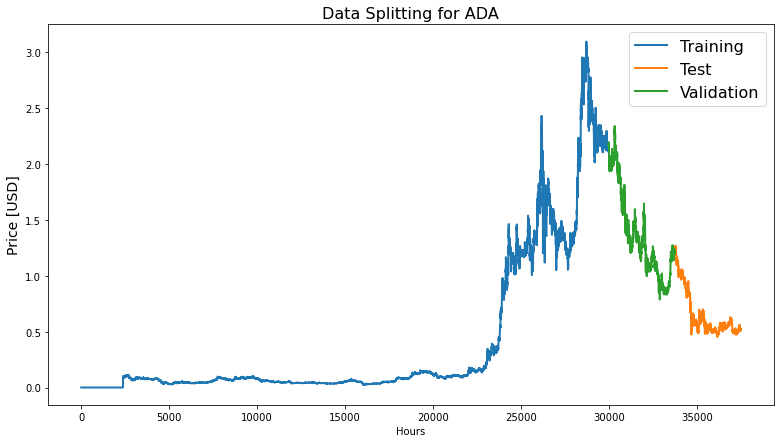

In [16]:
line_plot(train_df['close'], test_df['close'], validation_df['close'], 'Training', 'Test','Validation', title='Data Splitting for ADA')

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_close = MinMaxScaler()

In [18]:
x = train_[:,3].copy()
scale_close.fit(x.reshape(-1, 1))

MinMaxScaler()

In [19]:
scaler.fit(train_)

train_ = scaler.transform(train_)

valid_ = scaler.transform(valid_)
test_ = scaler.transform(test_)

In [21]:
# Now perform exponential moving average smoothing for smooth curve of data
EMA = 0.0
gamma = 0.165
for ti in range(train_.shape[0]):
    EMA = gamma*train_[ti] + (1-gamma)*EMA
    train_[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_,valid_, test_],axis=0)
all_mid_data

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       ...,
       [0.1712028 , 0.17142768, 0.17303412, 0.17101842, 0.08409072,
        0.03677713],
       [0.17097162, 0.17081676, 0.17241832, 0.17085528, 0.07655484,
        0.03344937],
       [0.170859  , 0.17048068, 0.17324396, 0.17122886, 0.02027191,
        0.00887684]])

In [16]:
#data splitting

def split_data(data):
    X = []
    Y = []
    for i in range(SEQ_LEN, len(data)-FUTURE_PERIOD+1):
        X.append(data[i-SEQ_LEN:i])
        Y.append(data[i+(FUTURE_PERIOD-1), 3])
    return np.array(X), np.array(Y)

In [17]:
X_train, y_train = split_data(train_)
X_test, y_test = split_data(test_)
X_valid, y_valid = split_data(valid_)


In [18]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 6))
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 6))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 6))

In [19]:
print("train shape {0}".format(X_train.shape))
print("valid shape {0}".format(X_valid.shape))
print("test shape {0}".format(X_test.shape))

train shape (29590, 120, 6)
valid shape (3586, 120, 6)
test shape (3585, 120, 6)


In [20]:
X_train_2, y_train_2 = split_data(train_)
X_train_2 = np.reshape(X_train_2, (X_train_2.shape[0], X_train_2.shape[1], 6))

In [21]:
#LSTM model

import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, LSTM, LeakyReLU, Dropout, BatchNormalization

# Initialize the RNN
model_LSTM1 = Sequential()
model_LSTM1.add(LSTM(units = 120, input_shape=(120, 6)))
model_LSTM1.add(LeakyReLU(alpha=0.5))
model_LSTM1.add(Dropout(0.5))
model_LSTM1.add(BatchNormalization())
model_LSTM1.add(Dense(1))
model_LSTM1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 120)               60960     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 120)               0         
                                                                 
 dropout (Dropout)           (None, 120)               0         
                                                                 
 batch_normalization (BatchN  (None, 120)              480       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1)                 121       
                                                                 
Total params: 61,561
Trainable params: 61,321
Non-trainable params: 240
__________________________________________________

In [22]:
model_LSTM1.compile(optimizer='adam', loss='mean_squared_error', metrics = ('MAPE'))

In [23]:
history_LSTM1 = model_LSTM1.fit(X_train, y_train,validation_data=(X_valid, y_valid), epochs=10, batch_size=128)

Epoch 1/10
232/232 [==============================] - 104s 429ms/step - loss: 0.0345 - MAPE: 4401494.0000 - val_loss: 0.0998 - val_MAPE: 62.8157
Epoch 2/10
232/232 [==============================] - 86s 371ms/step - loss: 0.0021 - MAPE: 2060770.1250 - val_loss: 0.0539 - val_MAPE: 45.5338
Epoch 3/10
232/232 [==============================] - 81s 348ms/step - loss: 0.0017 - MAPE: 1936280.3750 - val_loss: 0.0062 - val_MAPE: 15.5726
Epoch 4/10
232/232 [==============================] - 93s 400ms/step - loss: 0.0016 - MAPE: 1776976.8750 - val_loss: 0.0015 - val_MAPE: 8.0932
Epoch 5/10
232/232 [==============================] - 83s 357ms/step - loss: 0.0014 - MAPE: 1645035.0000 - val_loss: 0.0010 - val_MAPE: 6.6558
Epoch 6/10
232/232 [==============================] - 93s 401ms/step - loss: 0.0014 - MAPE: 1608988.5000 - val_loss: 2.1361e-04 - val_MAPE: 2.4093
Epoch 7/10
232/232 [==============================] - 99s 425ms/step - loss: 0.0014 - MAPE: 1643211.5000 - val_loss: 0.0013 - val_MAPE

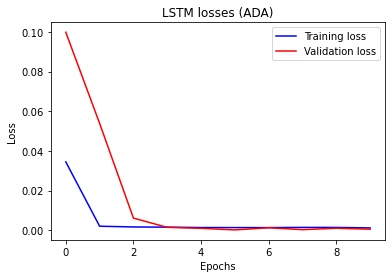

In [24]:
loss = history_LSTM1.history['loss']
val_loss = history_LSTM1.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("LSTM losses (ADA)")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

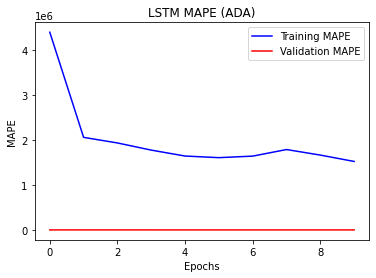

In [25]:
mape = history_LSTM1.history['MAPE']
val_mape = history_LSTM1.history['val_MAPE']

epochs = range(len(mape))

plt.figure()

plt.plot(epochs, mape, 'b', label='Training MAPE')
plt.plot(epochs, val_mape, 'r', label='Validation MAPE')
plt.title("LSTM MAPE (ADA)")
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [26]:
pred_LSTM1 = model_LSTM1.predict(X_test)


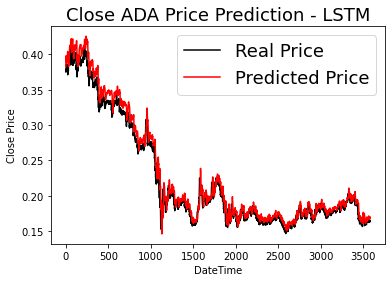

In [27]:
plt.plot(y_test, color = 'black', label = 'Real Price')
plt.plot(pred_LSTM1, color = 'red', label = 'Predicted Price')
plt.title('Close ADA Price Prediction - LSTM', fontsize=18)
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('DateTime')
plt.ylabel('Close Price')
plt.legend(fontsize=18)
plt.show()

In [28]:
import math

LSTM1_loss = model_LSTM1.evaluate(X_test, y_test, verbose=1)

#Err_LSTM1 = LSTM1_loss[0]
#Err_LSTM1 = math.sqrt(LSTM1_loss)
print('\nThe error of the model with 1 layer LSTM is:',LSTM1_loss)

113/113 [==============================] - 20s 175ms/step - loss: 1.3830e-04 - MAPE: 3.9715

The error of the model with 1 layer LSTM is: [0.0001383002381771803, 3.971501588821411]


In [29]:
from sklearn.metrics import mean_squared_error
MAE=mean_squared_error(pred_LSTM1, y_test)
MAE

0.00013830022375145893

In [30]:
from sklearn.metrics import r2_score
R2=r2_score(y_test, pred_LSTM1)
R2

0.9756311190853989

In [31]:
#GRU
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Reshape
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU
from keras.utils import np_utils
from keras.layers import GRU,CuDNNGRU
model_GRU = Sequential()

model_GRU.add(GRU(units=50, input_shape=(120,6),return_sequences=False))
model_GRU.add(Activation('tanh'))
model_GRU.add(Dropout(0.3))
model_GRU.add(Dense(1))
model_GRU.add(Activation('relu'))
model_GRU.compile(loss='mse', optimizer='adam', metrics = ('MAPE'))
model_GRU.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50)                8700      
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 8,751
Trainable params: 8,751
Non-trainable params: 0
_________________________________________________________________


In [32]:
history_GRU = model_GRU.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size = 128, epochs = 10)

Epoch 1/10
232/232 [==============================] - 112s 451ms/step - loss: 0.0048 - MAPE: 588853.8750 - val_loss: 3.9421e-04 - val_MAPE: 3.5900
Epoch 2/10
232/232 [==============================] - 103s 443ms/step - loss: 6.2388e-04 - MAPE: 208258.5625 - val_loss: 2.2057e-04 - val_MAPE: 2.5129
Epoch 3/10
232/232 [==============================] - 124s 535ms/step - loss: 5.5916e-04 - MAPE: 232665.6875 - val_loss: 3.0868e-04 - val_MAPE: 2.9841
Epoch 4/10
232/232 [==============================] - 94s 406ms/step - loss: 5.0728e-04 - MAPE: 239978.6250 - val_loss: 2.6628e-04 - val_MAPE: 2.8359
Epoch 5/10
232/232 [==============================] - 60s 258ms/step - loss: 4.9575e-04 - MAPE: 243727.1250 - val_loss: 4.5488e-04 - val_MAPE: 3.8761
Epoch 6/10
232/232 [==============================] - 61s 262ms/step - loss: 4.8214e-04 - MAPE: 266990.3750 - val_loss: 2.1632e-04 - val_MAPE: 2.4116
Epoch 7/10
232/232 [==============================] - 61s 262ms/step - loss: 4.6961e-04 - MAPE: 28678

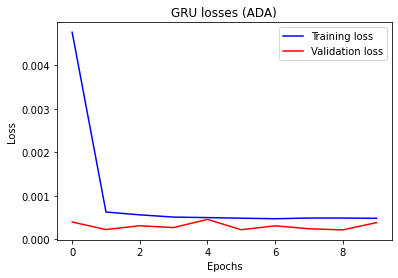

In [33]:
loss_GRU = history_GRU.history['loss']
val_loss_GRU = history_GRU.history['val_loss']

epochs = range(len(loss_GRU))

plt.figure()

plt.plot(epochs, loss_GRU, 'b', label='Training loss')
plt.plot(epochs, val_loss_GRU, 'r', label='Validation loss')
plt.title("GRU losses (ADA)")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

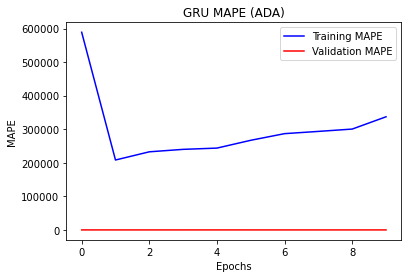

In [34]:
mape = history_GRU.history['MAPE']
val_mape = history_GRU.history['val_MAPE']

epochs = range(len(mape))

plt.figure()

plt.plot(epochs, mape, 'b', label='Training MAPE')
plt.plot(epochs, val_mape, 'r', label='Validation MAPE')
plt.title("GRU MAPE (ADA)")
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [35]:
pred_GRU = model_GRU.predict(X_test)

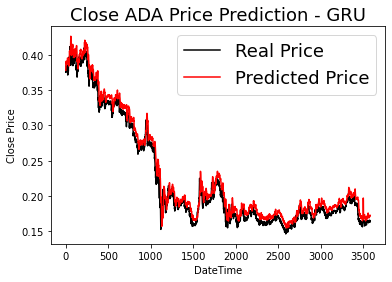

In [36]:
plt.plot(y_test, color = 'black', label = 'Real Price')
plt.plot(pred_GRU, color = 'red', label = 'Predicted Price')
plt.title('Close ADA Price Prediction - GRU', fontsize=18)
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('DateTime')
plt.ylabel('Close Price')
plt.legend(fontsize=18)
plt.show()

In [37]:


import math

GRU_loss = model_GRU.evaluate(X_test, y_test, verbose=1)

#Err_GRU = math.sqrt(GRU_loss)
print('\nThe error of the model with a GRU layer is:',GRU_loss)

113/113 [==============================] - 6s 57ms/step - loss: 1.3581e-04 - MAPE: 4.6043

The error of the model with a GRU layer is: [0.00013580714585259557, 4.6042561531066895]


In [38]:
from sklearn.metrics import mean_squared_error
MAE=mean_squared_error(pred_GRU, y_test)
MAE

0.00013580713853951346

In [39]:
from sklearn.metrics import r2_score
R2=r2_score(y_test, pred_GRU)
R2

0.9760704075767106

In [40]:
#Bi-LSTM
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, LSTM, LeakyReLU, Dropout, BatchNormalization
from keras.layers import Bidirectional

num_units = 128
activation_function = 'relu'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 128
num_epochs = 10

# Initialize the RNN
regressor2 = Sequential()

# Adding the input layer and the LSTM layer
#regressor2.add(tf.keras.layers.Conv1D(120, 3, activation="relu",input_shape=(120, 5)))
#regressor2.add(tf.keras.layers.AveragePooling1D(4))
regressor2.add(Bidirectional(LSTM(units = num_units, input_shape=(120, 6))))#activation = activation_function,
regressor2.add(LeakyReLU(alpha= 0.5))
regressor2.add(BatchNormalization())
regressor2.add(Dropout(0.5))
# Adding the output layer
regressor2.add(Dense(units = 1))
# Compiling the RNN
regressor2.compile(optimizer = optimizer, loss = loss_function, metrics = ('MAPE'))

In [41]:
# Using the training set to train the model
history_BiLSTM2 = regressor2.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size = batch_size, epochs = num_epochs)

Epoch 1/10
232/232 [==============================] - 147s 591ms/step - loss: 0.1012 - MAPE: 9802901.0000 - val_loss: 0.1238 - val_MAPE: 70.6319
Epoch 2/10
232/232 [==============================] - 129s 557ms/step - loss: 0.0044 - MAPE: 2811146.5000 - val_loss: 0.0603 - val_MAPE: 48.8808
Epoch 3/10
232/232 [==============================] - 136s 586ms/step - loss: 0.0018 - MAPE: 2093533.6250 - val_loss: 0.0075 - val_MAPE: 16.2729
Epoch 4/10
232/232 [==============================] - 132s 567ms/step - loss: 0.0015 - MAPE: 1756715.0000 - val_loss: 4.9571e-04 - val_MAPE: 4.1195
Epoch 5/10
232/232 [==============================] - 122s 526ms/step - loss: 0.0016 - MAPE: 1735739.6250 - val_loss: 5.2713e-04 - val_MAPE: 4.2622
Epoch 6/10
232/232 [==============================] - 181s 782ms/step - loss: 0.0012 - MAPE: 1612135.7500 - val_loss: 9.5184e-04 - val_MAPE: 5.8588
Epoch 7/10
232/232 [==============================] - 226s 977ms/step - loss: 0.0012 - MAPE: 1512174.0000 - val_loss: 5.2

In [42]:
regressor2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 256)              138240    
 l)                                                              
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 139,521
Trainable params: 139,009
Non-tr

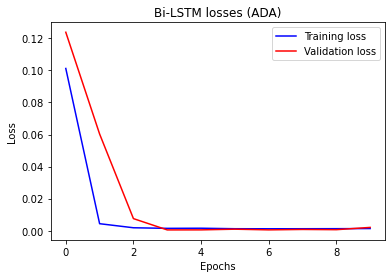

In [43]:
loss_BiLSTM2 = history_BiLSTM2.history['loss']
val_loss_BiLSTM2 = history_BiLSTM2.history['val_loss']

epochs = range(len(loss_BiLSTM2))

plt.figure()

plt.plot(epochs, loss_BiLSTM2, 'b', label='Training loss')
plt.plot(epochs, val_loss_BiLSTM2, 'r', label='Validation loss')
plt.title("Bi-LSTM losses (ADA)")
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

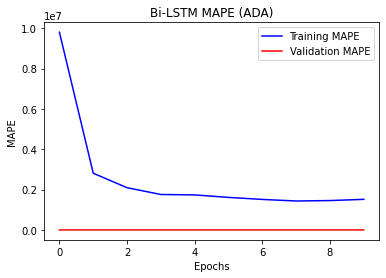

In [44]:
mape = history_BiLSTM2.history['MAPE']
val_mape = history_BiLSTM2.history['val_MAPE']

epochs = range(len(mape))

plt.figure()

plt.plot(epochs, mape, 'b', label='Training MAPE')
plt.plot(epochs, val_mape, 'r', label='Validation MAPE')
plt.title("Bi-LSTM MAPE (ADA)")
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [45]:
pred_BiLSTM2 = regressor2.predict(X_test)


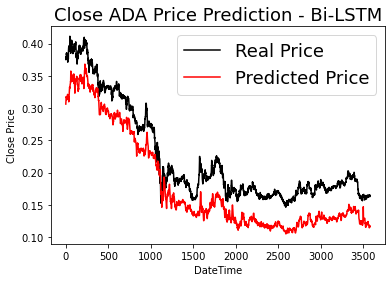

In [50]:
plt.plot(y_test, color = 'black', label = 'Real Price')
plt.plot(pred_BiLSTM2, color = 'red', label = 'Predicted Price')
plt.title('Close ADA Price Prediction - Bi-LSTM', fontsize=18)
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('DateTime')
plt.ylabel('Close Price')
plt.legend(fontsize=18)
plt.show()

In [47]:
import math

BiLSTM2_loss = regressor2.evaluate(X_test, y_test, verbose=1)

#Err_BiLSTM2 = math.sqrt(BiLSTM2_loss)
print('\nThe error of the model with 1 layer BiLSTM is:',BiLSTM2_loss)

113/113 [==============================] - 15s 132ms/step - loss: 0.0020 - MAPE: 21.1313

The error of the model with 1 layer BiLSTM is: [0.0019785682670772076, 21.13129425048828]


In [48]:
from sklearn.metrics import mean_squared_error
MAE=mean_squared_error(pred_BiLSTM2, y_test)
MAE

0.0019785679144026327

In [49]:
from sklearn.metrics import r2_score
R2=r2_score(y_test, pred_BiLSTM2)
R2

0.6513708757682335

In [ ]:
0.0019785679144026327